In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline
import seaborn as sns
sns.color_palette('muted')
sns_colours = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Viz5_August_Female_Political_Representation.csv')
data.rename(columns = {'Proportion of seats held by women in national parliaments (%)':'Proportion'},inplace=True)

In [9]:
data.head()

,Country Name,Country Code,Year,Proportion
0,Albania,ALB,1997,NaN
1,Albania,ALB,1998,NaN
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143


In [7]:
# Create dataframe for overall mean and median by year
averages_by_year = data.groupby('Year').agg({'Proportion':{'mean','median'}})
averages_by_year.columns = averages_by_year.columns.droplevel()
averages_by_year.reset_index(inplace=True)

In [20]:
# Create dataframe for annual box plots
annual_data = pd.pivot_table(data,index='Country Name',columns='Year')
annual_data.columns = annual_data.columns.droplevel()
annual_data.head()

Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,0.051613,0.051613,0.057143,0.057143,0.057143,0.064286,0.071429,0.071429,...,0.164286,0.157143,0.157143,0.178571,0.200000,0.207143,0.228571,0.278571,0.278571,0.295082
Algeria,0.031579,0.031579,0.031579,0.034211,0.034211,0.061697,0.061697,0.061697,0.061697,0.061697,...,0.077121,0.079692,0.316017,0.316017,0.316017,0.316017,0.316017,0.257576,0.257576,0.257576
Andorra,0.071429,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.142857,0.285714,0.285714,...,0.357143,0.500000,0.500000,0.500000,0.500000,0.392857,0.321429,0.321429,0.321429,0.464286
Angola,0.095455,0.154545,0.154545,0.154545,0.154545,0.154545,0.154545,0.150000,0.150000,0.150000,...,0.386364,0.381818,0.340909,0.340909,0.368182,0.368182,0.368182,0.304545,0.304545,0.300000
Antigua and Barbuda,0.052632,0.052632,NaN,0.052632,0.052632,0.052632,0.052632,0.105263,0.105263,0.105263,...,0.105263,0.105263,0.105263,0.105263,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


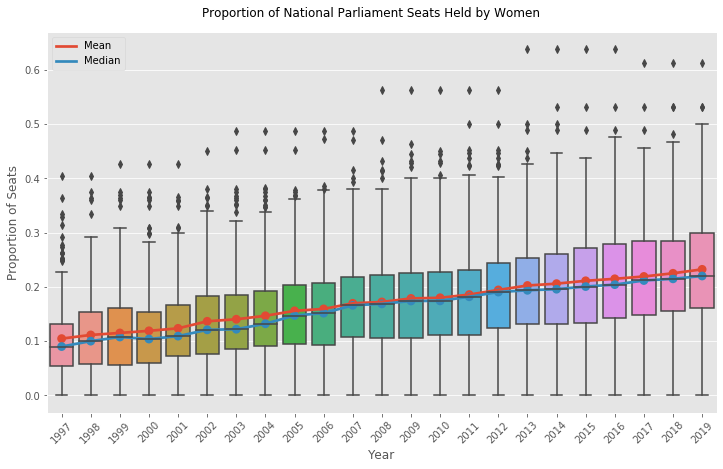

In [44]:
# Set up figure and add mean and median lines
fig = plt.figure(figsize=(12,7))
line1 = sns.pointplot(x = 'Year',y='mean',data=averages_by_year,label='Mean')
line2 = sns.pointplot(x='Year',y='median',data=averages_by_year,color = sns_colours[1],label='Median')

# Set up legend for mean and median
_ =  plt.legend([line1,line2],labels=['Mean','Median'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_color(sns_colours[1])

# Add annual box plots and configure axes appearance
_ = sns.boxplot(data=annual_data)
_ = plt.ylabel('Proportion of Seats')
_ = plt.suptitle('Proportion of National Parliament Seats Held by Women',y=0.93)
_ = plt.tick_params(axis='x',rotation=45)

plt.savefig('women_in_power.png')